### This notebook will call ebird.org API for recent sightings of rare birds

#### Tentatively, the goal is to see if sightings of birds drop with bad weather, including recent bad air days due to Canadian wildfires

In [1]:
from dotenv import load_dotenv
load_dotenv
import os
import requests

In [2]:
import pandas as pd

In [3]:
load_dotenv()

True

In [5]:
API_KEY = os.getenv("API_KEY")
# print(API_KEY)


In [5]:
# Creating URL for Bird API

lat = '40.732254'
lng = '-73.987411'

url = 'https://api.ebird.org/v2/data/obs/geo/recent?lat=' + lat + '&lng=' + lng

# url = 'https://api.ebird.org/v2/data/obs/geo/recent?lat=40.732254&lng=-73.987411'

print(url)

https://api.ebird.org/v2/data/obs/geo/recent?lat=40.732254&lng=-73.987411


In [7]:
payload={}
headers = {
  'X-eBirdApiToken': API_KEY
}

response = requests.request("GET", url, headers=headers, data=payload)

db = pd.read_json(response.text)
db

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,exoticCategory
0,dowwoo,Downy Woodpecker,Dryobates pubescens,L25635116,"236 Kane Street, New York, US (40.686, -73.995)",2023-07-02 11:57,1.0,40.685692,-73.995343,True,False,True,S143346394,NaN
1,greegr,Great Egret,Ardea alba,L25634733,"113 Mansion Ave, Yonkers US-NY 40.93248, -73.8...",2023-07-02 11:45,1.0,40.932483,-73.859959,True,False,True,S143344965,NaN
2,hergul,Herring Gull,Larus argentatus,L1342265,Hudson River Greenway--Clinton Cove (54th-59th...,2023-07-02 11:02,8.0,40.770527,-73.995350,True,False,False,S143342174,NaN
3,barswa,Barn Swallow,Hirundo rustica,L1342265,Hudson River Greenway--Clinton Cove (54th-59th...,2023-07-02 11:02,6.0,40.770527,-73.995350,True,False,False,S143342174,NaN
4,normoc,Northern Mockingbird,Mimus polyglottos,L1342265,Hudson River Greenway--Clinton Cove (54th-59th...,2023-07-02 11:02,1.0,40.770527,-73.995350,True,False,False,S143342174,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,dunlin,Dunlin,Calidris alpina,L165143,Jamaica Bay Wildlife Refuge,2023-06-19 17:44,1.0,40.617030,-73.824456,True,False,False,S142122044,NaN
167,whrsan,White-rumped Sandpiper,Calidris fuscicollis,L165143,Jamaica Bay Wildlife Refuge,2023-06-19 17:44,3.0,40.617030,-73.824456,True,True,False,S142122044,NaN
168,reshaw,Red-shouldered Hawk,Buteo lineatus,L1336189,Van Saun Park--Walden Pond,2023-06-19 16:30,1.0,40.923761,-74.049868,True,False,False,S142110385,NaN
169,redkno,Red Knot,Calidris canutus,L7926210,"Jamaica Bay, Elder's Point Marsh (East)",2023-06-19 11:01,3.0,40.635622,-73.847586,True,True,False,S142120488,NaN


In [9]:
url2 = url + '&back=30'

payload={}
headers = {
  'X-eBirdApiToken': API_KEY
}

response = requests.request("GET", url2, headers=headers, data=payload)

db1 = pd.read_json(response.text)
db1

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,exoticCategory
0,dowwoo,Downy Woodpecker,Dryobates pubescens,L25635116,"236 Kane Street, New York, US (40.686, -73.995)",2023-07-02 11:57,1.0,40.685692,-73.995343,True,False,True,S143346394,NaN
1,greegr,Great Egret,Ardea alba,L25634733,"113 Mansion Ave, Yonkers US-NY 40.93248, -73.8...",2023-07-02 11:45,1.0,40.932483,-73.859959,True,False,True,S143344965,NaN
2,hergul,Herring Gull,Larus argentatus,L1342265,Hudson River Greenway--Clinton Cove (54th-59th...,2023-07-02 11:02,8.0,40.770527,-73.995350,True,False,False,S143342174,NaN
3,barswa,Barn Swallow,Hirundo rustica,L1342265,Hudson River Greenway--Clinton Cove (54th-59th...,2023-07-02 11:02,6.0,40.770527,-73.995350,True,False,False,S143342174,NaN
4,normoc,Northern Mockingbird,Mimus polyglottos,L1342265,Hudson River Greenway--Clinton Cove (54th-59th...,2023-07-02 11:02,1.0,40.770527,-73.995350,True,False,False,S143342174,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,kenwar,Kentucky Warbler,Geothlypis formosa,L2864862,Reeds Basket Willow Swamp Park,2023-06-04 09:50,1.0,40.600939,-74.104175,True,True,False,S140832671,NaN
212,yerwar,Yellow-rumped Warbler,Setophaga coronata,L3151880,Bush Terminal Piers Park,2023-06-04 09:08,2.0,40.654161,-74.020445,True,True,False,S140555366,NaN
213,hoomer,Hooded Merganser,Lophodytes cucullatus,L389007,Richard W. DeKorte Park,2023-06-04 05:30,2.0,40.783300,-74.102517,True,True,False,S140427621,NaN
214,boboli,Bobolink,Dolichonyx oryzivorus,L389007,Richard W. DeKorte Park,2023-06-03 16:30,1.0,40.783300,-74.102517,True,True,False,S140388317,NaN


In [ ]:
db1.sort_values('obsDt')

looks like these observations get cleaned with time.

let's take a look at numbers by date

In [10]:
db1.to_csv('birdsout0702.csv', index=False)

In [ ]:
db1.obsDt

In [ ]:
    db1.obsDt = db1.obsDt.str[0:10]
    db1

In [ ]:
db1.groupby('obsDt').count()

#### so the observations get cleaned. let's see if there's another data point available

In [6]:
url = "https://api.ebird.org/v2/ref/region/list/subnational2/US-NY"

payload={}
headers = {
  'X-eBirdApiToken': API_KEY
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

[{"code":"US-NY-001","name":"Albany"},{"code":"US-NY-003","name":"Allegany"},{"code":"US-NY-005","name":"Bronx"},{"code":"US-NY-007","name":"Broome"},{"code":"US-NY-009","name":"Cattaraugus"},{"code":"US-NY-011","name":"Cayuga"},{"code":"US-NY-013","name":"Chautauqua"},{"code":"US-NY-015","name":"Chemung"},{"code":"US-NY-017","name":"Chenango"},{"code":"US-NY-019","name":"Clinton"},{"code":"US-NY-021","name":"Columbia"},{"code":"US-NY-023","name":"Cortland"},{"code":"US-NY-025","name":"Delaware"},{"code":"US-NY-027","name":"Dutchess"},{"code":"US-NY-029","name":"Erie"},{"code":"US-NY-031","name":"Essex"},{"code":"US-NY-033","name":"Franklin"},{"code":"US-NY-035","name":"Fulton"},{"code":"US-NY-037","name":"Genesee"},{"code":"US-NY-039","name":"Greene"},{"code":"US-NY-041","name":"Hamilton"},{"code":"US-NY-043","name":"Herkimer"},{"code":"US-NY-045","name":"Jefferson"},{"code":"US-NY-047","name":"Kings"},{"code":"US-NY-049","name":"Lewis"},{"code":"US-NY-051","name":"Livingston"},{"code

In [7]:
# this is stats for a given date in a given region

# url = "https://api.ebird.org/v2/product/stats/{{regionCode}}/{{y}}/{{m}}/{{d}}"

url = "https://api.ebird.org/v2/product/stats/US-NY/2023/6/25"

payload={}
headers = {
  'X-eBirdApiToken': API_KEY
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

{"numChecklists":1520,"numContributors":905,"numSpecies":218}


#### Problem with data

Statistics are not provided for sub-regions, so I cannot check the number of submissions for NYC only. New York State is too big geographically to tie to a weather observation. But, I will get statistics for NJ and CT in June, add to NY - where most of the population lives in the tri-state areaa - and check against local weather in NYC for this project. 

Another way to do this may be to get the checklist feed on a given date and filter out NYC submissions, but that would mean requesting a lot of data and I don't want to get banned from the API just yet.

In [8]:
from datetime import date, timedelta

In [9]:
# grabbed from the web



from datetime import date, timedelta

def date_range_list(start_date, end_date):
    # Return generator for a list datetime.date objects (inclusive) between start_date and end_date (inclusive).
    curr_date = start_date
    while curr_date <= end_date:
        yield curr_date 
        curr_date += timedelta(days=1)

start_date = date(year=2023, month=4, day=1)
stop_date = date(year=2023, month=7, day=2)
date_list = date_range_list(start_date, stop_date)
# date_list

# for date in date_list:
#     print(date, date.isoweekday())

obs_dates = [date for date in date_list]
# obs_dates

In [10]:
# there should be a more elegant way to do this, but for now...
# this is a list of days of week for the observed dates list, to append to the df later

days_of_week = [date.isoweekday() for date in obs_dates]

In [13]:
nj_data = []
for date in obs_dates:
    url = f"https://api.ebird.org/v2/product/stats/US-NJ/{date.year}/{date.month}/{date.day}"
#     print(url)
    
    payload={}
    headers = {
      'X-eBirdApiToken': API_KEY
    }
    response = requests.request("GET", url, headers=headers, data=payload)
#     print(response)
    text = response.json()
    # nj_data.append(text)
    nj_data.append(text)


In [16]:
# pd.DataFrame(nj_data, index=obs_dates)
nj_df = pd.DataFrame(nj_data, index=obs_dates)
# nj_df["dayOfWeek"] = days_of_week
nj_df

,numChecklists,numContributors,numSpecies,dayOfWeek
2023-04-01,494,402,159,6
2023-04-02,550,448,170,7
2023-04-03,473,388,162,1
2023-04-04,545,448,177,2
2023-04-05,450,370,168,3
...,...,...,...,...
2023-06-28,287,247,174,3
2023-06-29,282,246,166,4
2023-06-30,288,249,166,5
2023-07-01,398,315,168,6


In [17]:
# save so I don't have to rerun the requests
nj_df.to_csv('nj_df.csv')

In [18]:
ct_data = []
for date in obs_dates:
    url = f"https://api.ebird.org/v2/product/stats/US-CT/{date.year}/{date.month}/{date.day}"
    # print(url)
    
    payload={}
    headers = {
      'X-eBirdApiToken': API_KEY
    }
    response = requests.request("GET", url, headers=headers, data=payload)
    text = response.json()
    # nj_data.append(text)
    ct_data.append(text)
ct_df = pd.DataFrame(ct_data, index=obs_dates)
ct_df

,numChecklists,numContributors,numSpecies
2023-04-01,317,229,133
2023-04-02,418,287,137
2023-04-03,274,209,133
2023-04-04,323,253,140
2023-04-05,238,192,133
...,...,...,...
2023-06-28,151,130,136
2023-06-29,166,144,147
2023-06-30,181,155,153
2023-07-01,217,174,161


In [19]:
# save so I don't have to rerun the requests
ct_df.to_csv('ct_df.csv')

In [19]:
ny_data = []
for date in obs_dates:
    url = f"https://api.ebird.org/v2/product/stats/US-NY/{date.year}/{date.month}/{date.day}"
    # print(url)
    
    payload={}
    headers = {
      'X-eBirdApiToken': API_KEY
    }
    response = requests.request("GET", url, headers=headers, data=payload)
    text = response.json()
    # nj_data.append(text)
    ny_data.append(text)
ny_df = pd.DataFrame(ny_data, index=obs_dates)
ny_df

,numChecklists,numContributors,numSpecies
2023-04-01,1554,1092,174
2023-04-02,2077,1205,182
2023-04-03,1332,1000,173
2023-04-04,1509,1117,175
2023-04-05,1314,967,176
...,...,...,...
2023-06-28,787,594,215
2023-06-29,953,655,218
2023-06-30,1003,672,210
2023-07-01,1240,754,216


In [20]:
# save so I don't have to rerun the requests
ny_df.to_csv('ny_df.csv')

In [248]:
tristate_df = ny_df.add(nj_df)
tristate_df.add(ct_df)
tristate_df['dayOfWeek'] = days_of_week
tristate_df

,dayOfWeek,numChecklists,numContributors,numSpecies
2023-04-01,6,2048,1494,333
2023-04-02,7,2627,1653,352
2023-04-03,1,1805,1388,335
2023-04-04,2,2054,1565,352
2023-04-05,3,1764,1337,344
...,...,...,...,...
2023-06-28,3,1074,841,389
2023-06-29,4,1235,901,384
2023-06-30,5,1291,921,376
2023-07-01,6,1638,1069,384


In [249]:
tristate_df.dtypes

dayOfWeek          int64
numChecklists      int64
numContributors    int64
numSpecies         int64
dtype: object

In [250]:
tri_full_week = tristate_df.iloc[2:]
tri_full_week

,dayOfWeek,numChecklists,numContributors,numSpecies
2023-04-03,1,1805,1388,335
2023-04-04,2,2054,1565,352
2023-04-05,3,1764,1337,344
2023-04-06,4,2052,1573,360
2023-04-07,5,2163,1624,358
...,...,...,...,...
2023-06-28,3,1074,841,389
2023-06-29,4,1235,901,384
2023-06-30,5,1291,921,376
2023-07-01,6,1638,1069,384


In [31]:
# tristate_df["date"] = tristate_df.index.astype(str)


,dayOfWeek,numChecklists,numContributors,numSpecies,date
2023-04-01,6,2048,1494,333,2023-04-01
2023-04-02,7,2627,1653,352,2023-04-02
2023-04-03,1,1805,1388,335,2023-04-03
2023-04-04,2,2054,1565,352,2023-04-04
2023-04-05,3,1764,1337,344,2023-04-05
...,...,...,...,...,...
2023-06-28,3,1074,841,389,2023-06-28
2023-06-29,4,1235,901,384,2023-06-29
2023-06-30,5,1291,921,376,2023-06-30
2023-07-01,6,1638,1069,384,2023-07-01


In [265]:
tristate_df.index

RangeIndex(start=0, stop=93, step=1)

In [266]:
tristate_df.sort_values('numChecklists', ascending=False)

,date,dayOfWeek,numChecklists,numContributors,numSpecies
42,2023-05-13,6,8951,3579,526
36,2023-05-07,7,4454,2922,501
35,2023-05-06,6,4052,2642,495
50,2023-05-21,7,3895,2327,484
41,2023-05-12,5,3616,2433,499
...,...,...,...,...,...
68,2023-06-08,4,1136,886,401
67,2023-06-07,3,1125,853,402
74,2023-06-14,3,1078,843,403
88,2023-06-28,3,1074,841,389


In [267]:
tristate_df

,date,dayOfWeek,numChecklists,numContributors,numSpecies
0,2023-04-01,6,2048,1494,333
1,2023-04-02,7,2627,1653,352
2,2023-04-03,1,1805,1388,335
3,2023-04-04,2,2054,1565,352
4,2023-04-05,3,1764,1337,344
...,...,...,...,...,...
88,2023-06-28,3,1074,841,389
89,2023-06-29,4,1235,901,384
90,2023-06-30,5,1291,921,376
91,2023-07-01,6,1638,1069,384


<Axes: >

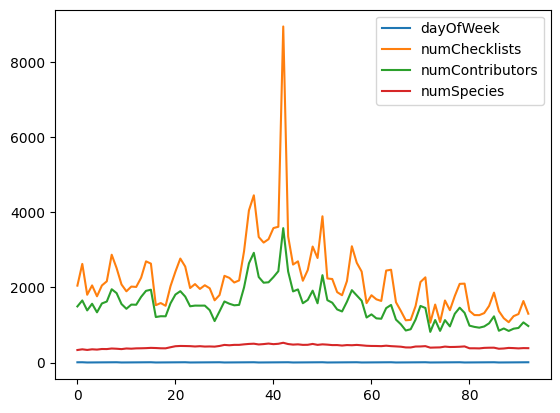

In [269]:
tristate_df.plot()

<Axes: xlabel='date'>

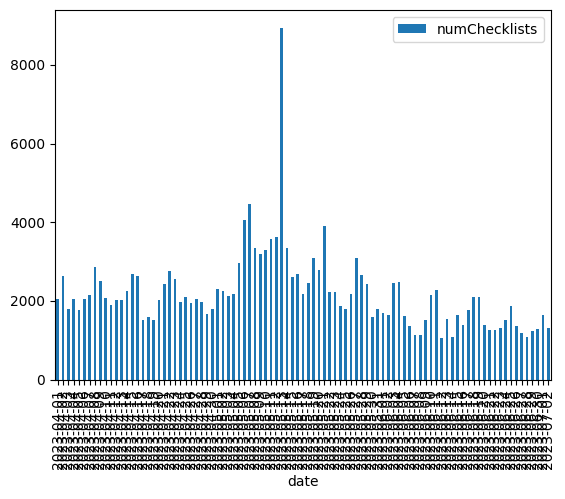

In [268]:
tristate_df.plot(x='date', y='numChecklists', kind='bar')

In [184]:
# before we do day of week analysis, let's drop a few days to make it even number of days across multiple weeks.

tri

<Axes: xlabel='dayOfWeek'>

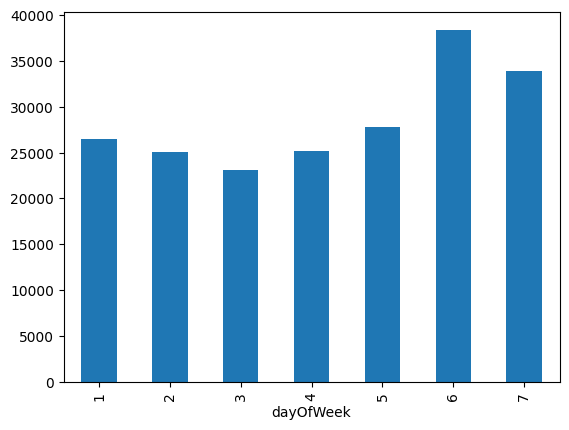

In [190]:
by_dow = tri_full_week.groupby('dayOfWeek')['numChecklists'].sum()
by_dow.plot(kind='bar')

In [175]:
tristate_df.numChecklists.to_csv('tristate_df_numcheck.csv')

In [191]:
# this is the sum total for 3 months for each day of the week.
# the bar above shows a clear case of the "hump day," and predictably, a weekend spike in submissions.
by_dow

dayOfWeek
1    26453
2    25047
3    23060
4    25148
5    27798
6    38385
7    33864
Name: numChecklists, dtype: int64

<Axes: xlabel='dayOfWeek'>

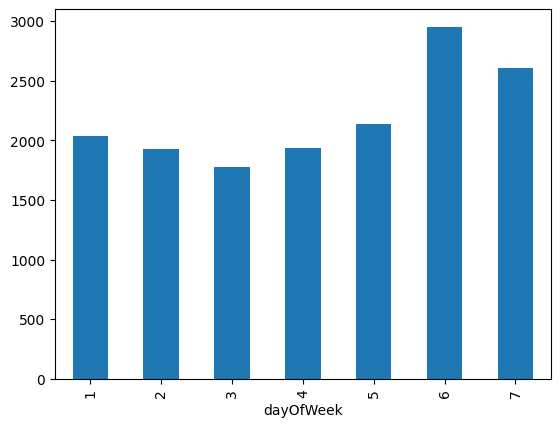

In [195]:
by_dow_avg = tri_full_week.groupby('dayOfWeek')['numChecklists'].sum() / 13
by_dow_avg.plot(kind='bar')

In [197]:
by_dow_avg.to_csv('by_dow_avg.csv')

<Axes: xlabel='date'>

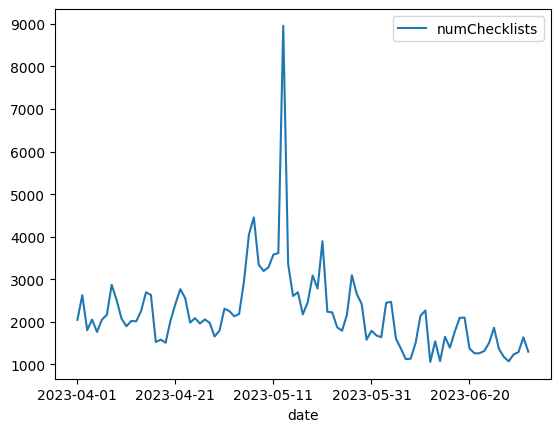

In [55]:
tristate_df.plot(x='date', y='numChecklists')

<Axes: >

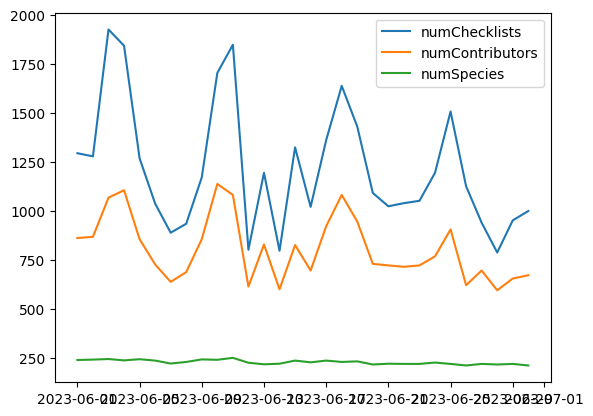

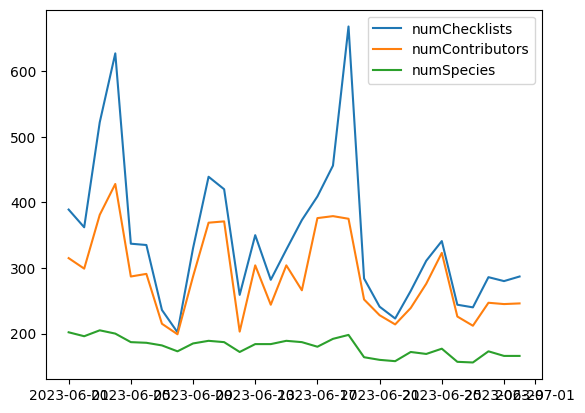

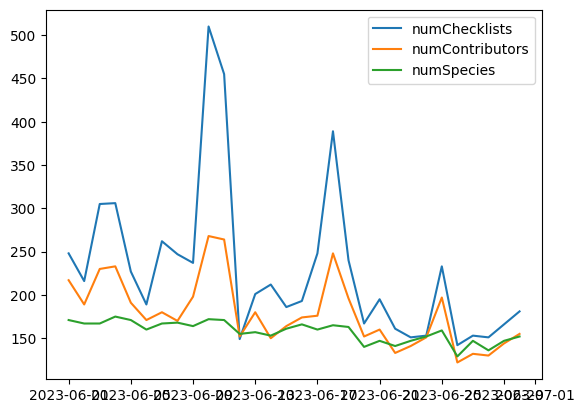

In [29]:
ny_june.plot()
nj_june.plot()
ct_june.plot()

In [ ]:
# before we pull the weather from the api, let's check the air quality levels.
# unfortunately weatherapi does not have historical air quality data
# csv comes from https://aqicn.org/historical#!city:usa/newyork

In [147]:
aqi.sort_values('date', ascending=False, inplace=True)
aqi

,date,pm25,o3,no2,co
3,2023/7/5,49,,,
2,2023/7/4,39,32,9,2
1,2023/7/3,76,52,8,2
0,2023/7/2,106,44,7,4
94,2023/7/1,151,66,10,6
...,...,...,...,...,...
3343,2014/1/14,67,,,
3342,2014/1/13,57,,,
3341,2014/1/12,57,,,
3340,2014/1/11,107,,,


In [216]:
aqi = pd.read_csv('new-york-air-quality.csv')
aqi = aqi.sort_values('date', ascending=False).iloc[3:96]
aqi.date = pd.to_datetime(aqi.date)
aqi = aqi.sort_values('date',ascending=True)

In [233]:
aqi.rename(columns={" pm25": "pm25"}, inplace=True)

In [241]:
aqi.pm25 = aqi.pm25.astype(int)


In [244]:
aqi.sort_values('pm25', ascending=False).head(15)

,date,pm25,o3,no2,co
71,2023-06-08,247,30,9,6
72,2023-06-09,168,26,7,1
70,2023-06-07,163,32,9,7
94,2023-07-01,151,66,10,6
0,2023-07-02,106,44,7,4
93,2023-06-30,105,81,21,8
75,2023-06-12,91,40,10,2
81,2023-06-18,81,31,3,2
76,2023-06-13,77,46,5,1
45,2023-05-13,66,46,10,1


In [ ]:
#  get back to this.. need to clean the dataframe

### Let's check the weather

In [78]:
load_dotenv()
API_KEY_WEATHER = os.getenv("API_KEY_WEATHER")
# print(API_KEY_WEATHER)

In [79]:
city = 'NYC'
url = "http://api.weatherapi.com/v1/current.json?key=" + API_KEY_WEATHER + "&q=" + city + "&aqi=yes"

response = requests.get(url)
print(url)
print(response)

http://api.weatherapi.com/v1/current.json?key=97e443e4d87f4fa58ab203836230307&q=NYC&aqi=yes
<Response [200]>


In [85]:
obs_dates[0].year

2023

In [87]:
# test historical

url = f"http://api.weatherapi.com/v1/history.json?key={API_KEY_WEATHER}&q=NYC&dt={obs_dates[0].year}-{obs_dates[0].month}-{obs_dates[0].day}"

# print(url)

response = requests.get(url)
print(url)
print(response)

http://api.weatherapi.com/v1/history.json?key=97e443e4d87f4fa58ab203836230307&q=NYC&dt=2023-4-1
<Response [200]>


In [103]:
wx_data = []
for date in obs_dates:
    url = f"http://api.weatherapi.com/v1/history.json?key={API_KEY_WEATHER}&q=NYC&dt={date.year}-{date.month}-{date.day}"

#     print(url)
    
    payload={}
    headers = {
      'X-eBirdApiToken': API_KEY
    }
    response = requests.request("GET", url, headers=headers, data=payload)
    
    text = response.json()
    
    wx_data.append(text)




# wx_df = pd.DataFrame(wx_data, index=obs_dates)
# wx_df

In [106]:
wx_data[0]

{'location': {'name': 'New York',
  'region': 'New York',
  'country': 'United States of America',
  'lat': 40.71,
  'lon': -74.01,
  'tz_id': 'America/New_York',
  'localtime_epoch': 1688487041,
  'localtime': '2023-07-04 12:10'},
 'forecast': {'forecastday': [{'date': '2023-04-01',
    'date_epoch': 1680307200,
    'day': {'maxtemp_c': 24.9,
     'maxtemp_f': 76.8,
     'mintemp_c': 11.0,
     'mintemp_f': 51.8,
     'avgtemp_c': 15.1,
     'avgtemp_f': 59.2,
     'maxwind_mph': 23.7,
     'maxwind_kph': 38.2,
     'totalprecip_mm': 19.2,
     'totalprecip_in': 0.76,
     'avgvis_km': 8.5,
     'avgvis_miles': 5.0,
     'avghumidity': 76.0,
     'condition': {'text': 'Moderate rain',
      'icon': '//cdn.weatherapi.com/weather/64x64/day/302.png',
      'code': 1189},
     'uv': 5.0},
    'astro': {'sunrise': '06:40 AM',
     'sunset': '07:21 PM',
     'moonrise': '02:53 PM',
     'moonset': '04:57 AM',
     'moon_phase': 'Waxing Gibbous',
     'moon_illumination': '76'},
    'hour': 

In [109]:
# backup this list 
import json
 output_file = open('list_dic', 'w', encoding='utf-8')
 for dic in wx_data:
    json.dump(dic, output_file) 
    output_file.write("\n")

In [115]:
# figure out json structure
wx_data[0]['forecast']['forecastday'][0]['day']

{'maxtemp_c': 24.9,
 'maxtemp_f': 76.8,
 'mintemp_c': 11.0,
 'mintemp_f': 51.8,
 'avgtemp_c': 15.1,
 'avgtemp_f': 59.2,
 'maxwind_mph': 23.7,
 'maxwind_kph': 38.2,
 'totalprecip_mm': 19.2,
 'totalprecip_in': 0.76,
 'avgvis_km': 8.5,
 'avgvis_miles': 5.0,
 'avghumidity': 76.0,
 'condition': {'text': 'Moderate rain',
  'icon': '//cdn.weatherapi.com/weather/64x64/day/302.png',
  'code': 1189},
 'uv': 5.0}

In [129]:
wx_df = pd.DataFrame([day['forecast']['forecastday'][0]['day'] for day in wx_data], index=obs_dates)
wx_df

,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,avgtemp_f,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,condition,uv
2023-04-01,24.9,76.8,11.0,51.8,15.1,59.2,23.7,38.2,19.2,0.76,8.5,5.0,76.0,"{'text': 'Moderate rain', 'icon': '//cdn.weath...",5.0
2023-04-02,12.8,55.0,1.1,34.0,7.1,44.9,21.0,33.8,0.0,0.00,10.0,6.0,39.0,"{'text': 'Sunny', 'icon': '//cdn.weatherapi.co...",4.0
2023-04-03,19.8,67.6,0.2,32.4,10.2,50.4,15.4,24.8,0.0,0.00,10.0,6.0,46.0,"{'text': 'Partly cloudy', 'icon': '//cdn.weath...",5.0
2023-04-04,18.5,65.3,6.4,43.5,13.6,56.5,10.7,17.3,0.0,0.00,10.0,6.0,72.0,"{'text': 'Mist', 'icon': '//cdn.weatherapi.com...",4.0
2023-04-05,17.0,62.6,10.9,51.6,13.7,56.6,14.3,23.0,2.1,0.08,8.2,5.0,89.0,"{'text': 'Patchy rain possible', 'icon': '//cd...",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28,29.4,84.9,19.4,66.9,23.4,74.0,10.3,16.6,4.8,0.19,9.6,5.0,74.0,"{'text': 'Light rain shower', 'icon': '//cdn.w...",6.0
2023-06-29,33.9,93.0,18.0,64.4,24.1,75.4,9.4,15.1,0.0,0.00,10.0,6.0,60.0,"{'text': 'Cloudy', 'icon': '//cdn.weatherapi.c...",7.0
2023-06-30,32.1,89.8,18.8,65.8,24.7,76.5,14.3,23.0,0.0,0.00,10.0,6.0,64.0,"{'text': 'Mist', 'icon': '//cdn.weatherapi.com...",7.0
2023-07-01,28.1,82.6,18.7,65.7,23.3,73.9,10.7,17.3,0.0,0.00,10.0,6.0,63.0,"{'text': 'Cloudy', 'icon': '//cdn.weatherapi.c...",6.0


In [157]:
# clean the condition column
wx_df.condition = [day['forecast']['forecastday'][0]['day']['condition']['text'] for day in wx_data]
wx_df

,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,avgtemp_f,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,condition,uv
2023-04-01,24.9,76.8,11.0,51.8,15.1,59.2,23.7,38.2,19.2,0.76,8.5,5.0,76.0,Moderate rain,5.0
2023-04-02,12.8,55.0,1.1,34.0,7.1,44.9,21.0,33.8,0.0,0.00,10.0,6.0,39.0,Sunny,4.0
2023-04-03,19.8,67.6,0.2,32.4,10.2,50.4,15.4,24.8,0.0,0.00,10.0,6.0,46.0,Partly cloudy,5.0
2023-04-04,18.5,65.3,6.4,43.5,13.6,56.5,10.7,17.3,0.0,0.00,10.0,6.0,72.0,Mist,4.0
2023-04-05,17.0,62.6,10.9,51.6,13.7,56.6,14.3,23.0,2.1,0.08,8.2,5.0,89.0,Patchy rain possible,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28,29.4,84.9,19.4,66.9,23.4,74.0,10.3,16.6,4.8,0.19,9.6,5.0,74.0,Light rain shower,6.0
2023-06-29,33.9,93.0,18.0,64.4,24.1,75.4,9.4,15.1,0.0,0.00,10.0,6.0,60.0,Cloudy,7.0
2023-06-30,32.1,89.8,18.8,65.8,24.7,76.5,14.3,23.0,0.0,0.00,10.0,6.0,64.0,Mist,7.0
2023-07-01,28.1,82.6,18.7,65.7,23.3,73.9,10.7,17.3,0.0,0.00,10.0,6.0,63.0,Cloudy,6.0


<Axes: >

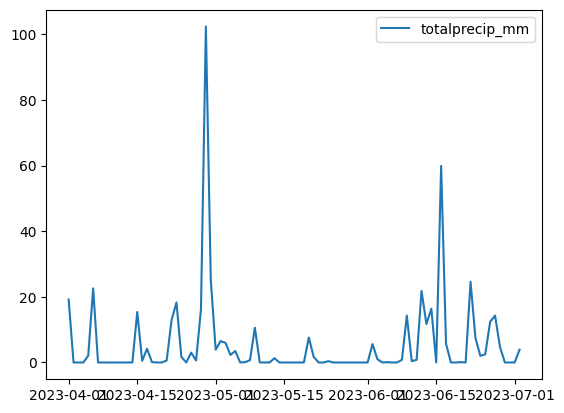

In [163]:
wx_df.plot(y='totalprecip_mm')

In [288]:
wx_df.sort_values('totalprecip_mm', ascending=False).head(20)

,date,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,avgtemp_f,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,condition,uv
28,2023-04-29,13.9,57.0,10.3,50.5,11.5,52.7,20.8,33.5,102.4,4.03,6.1,3.0,86.0,Heavy rain,3.0
76,2023-06-16,26.3,79.3,18.2,64.8,20.4,68.8,10.3,16.6,59.9,2.36,8.9,5.0,66.0,Moderate or heavy rain shower,6.0
29,2023-04-30,15.9,60.6,11.1,52.0,13.5,56.3,14.1,22.7,25.2,0.99,8.7,5.0,93.0,Light rain shower,4.0
82,2023-06-22,18.2,64.8,15.4,59.7,16.8,62.3,15.4,24.8,24.6,0.97,8.1,5.0,91.0,Light rain shower,4.0
5,2023-04-06,26.4,79.5,9.3,48.7,16.4,61.6,15.7,25.2,22.6,0.89,8.8,5.0,80.0,Light rain shower,6.0
72,2023-06-12,26.0,78.8,19.8,67.6,21.8,71.2,18.6,29.9,21.8,0.86,9.7,6.0,76.0,Light rain shower,6.0
0,2023-04-01,24.9,76.8,11.0,51.8,15.1,59.2,23.7,38.2,19.2,0.76,8.5,5.0,76.0,Moderate rain,5.0
22,2023-04-23,19.9,67.8,9.7,49.5,14.9,58.8,15.7,25.2,18.3,0.72,9.2,5.0,66.0,Light rain shower,4.0
74,2023-06-14,23.9,75.0,16.4,61.5,18.9,66.0,17.7,28.4,16.4,0.65,9.4,5.0,74.0,Light rain shower,5.0
27,2023-04-28,13.3,55.9,9.7,49.5,11.8,53.2,14.1,22.7,16.2,0.64,8.2,5.0,63.0,Light rain,3.0


In [164]:
import matplotlib.pyplot as plt

<Axes: >

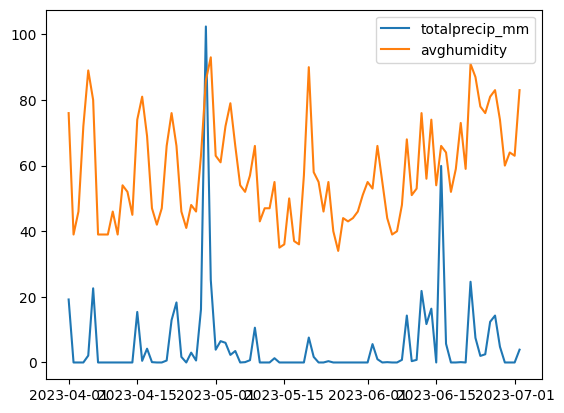

In [172]:
wx_df[['totalprecip_mm','avghumidity']].plot()

In [275]:
wx_df = wx_df.reset_index(names='date')
wx_df

,date,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,avgtemp_f,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,condition,uv
0,2023-04-01,24.9,76.8,11.0,51.8,15.1,59.2,23.7,38.2,19.2,0.76,8.5,5.0,76.0,Moderate rain,5.0
1,2023-04-02,12.8,55.0,1.1,34.0,7.1,44.9,21.0,33.8,0.0,0.00,10.0,6.0,39.0,Sunny,4.0
2,2023-04-03,19.8,67.6,0.2,32.4,10.2,50.4,15.4,24.8,0.0,0.00,10.0,6.0,46.0,Partly cloudy,5.0
3,2023-04-04,18.5,65.3,6.4,43.5,13.6,56.5,10.7,17.3,0.0,0.00,10.0,6.0,72.0,Mist,4.0
4,2023-04-05,17.0,62.6,10.9,51.6,13.7,56.6,14.3,23.0,2.1,0.08,8.2,5.0,89.0,Patchy rain possible,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2023-06-28,29.4,84.9,19.4,66.9,23.4,74.0,10.3,16.6,4.8,0.19,9.6,5.0,74.0,Light rain shower,6.0
89,2023-06-29,33.9,93.0,18.0,64.4,24.1,75.4,9.4,15.1,0.0,0.00,10.0,6.0,60.0,Cloudy,7.0
90,2023-06-30,32.1,89.8,18.8,65.8,24.7,76.5,14.3,23.0,0.0,0.00,10.0,6.0,64.0,Mist,7.0
91,2023-07-01,28.1,82.6,18.7,65.7,23.3,73.9,10.7,17.3,0.0,0.00,10.0,6.0,63.0,Cloudy,6.0


In [284]:
merged = tristate_df.merge(wx_df, left_on='date', right_on='date')
merged_plot = merged[['totalprecip_mm','numChecklists']]
merged_plot.totalprecip_mm = merged_plot.totalprecip_mm * 100

/var/folders/m5/3hd1bhmn37bf8zj22lkn_nl80000gn/T/ipykernel_50401/2561681846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_plot.totalprecip_mm = merged_plot.totalprecip_mm * 100


<Axes: >

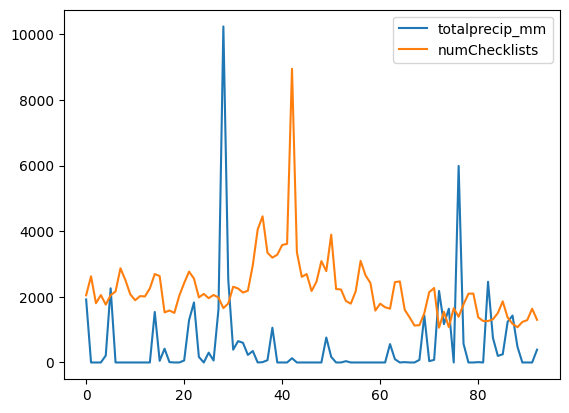

In [285]:
merged_plot.plot()

In [298]:
merged_nospike = merged.loc[merged["numChecklists"] < 8000]

In [299]:
merged_nospike

,date,dayOfWeek,numChecklists,numContributors,numSpecies,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,avgtemp_f,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,condition,uv
0,2023-04-01,6,2048,1494,333,24.9,76.8,11.0,51.8,15.1,59.2,23.7,38.2,19.2,0.76,8.5,5.0,76.0,Moderate rain,5.0
1,2023-04-02,7,2627,1653,352,12.8,55.0,1.1,34.0,7.1,44.9,21.0,33.8,0.0,0.00,10.0,6.0,39.0,Sunny,4.0
2,2023-04-03,1,1805,1388,335,19.8,67.6,0.2,32.4,10.2,50.4,15.4,24.8,0.0,0.00,10.0,6.0,46.0,Partly cloudy,5.0
3,2023-04-04,2,2054,1565,352,18.5,65.3,6.4,43.5,13.6,56.5,10.7,17.3,0.0,0.00,10.0,6.0,72.0,Mist,4.0
4,2023-04-05,3,1764,1337,344,17.0,62.6,10.9,51.6,13.7,56.6,14.3,23.0,2.1,0.08,8.2,5.0,89.0,Patchy rain possible,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2023-06-28,3,1074,841,389,29.4,84.9,19.4,66.9,23.4,74.0,10.3,16.6,4.8,0.19,9.6,5.0,74.0,Light rain shower,6.0
89,2023-06-29,4,1235,901,384,33.9,93.0,18.0,64.4,24.1,75.4,9.4,15.1,0.0,0.00,10.0,6.0,60.0,Cloudy,7.0
90,2023-06-30,5,1291,921,376,32.1,89.8,18.8,65.8,24.7,76.5,14.3,23.0,0.0,0.00,10.0,6.0,64.0,Mist,7.0
91,2023-07-01,6,1638,1069,384,28.1,82.6,18.7,65.7,23.3,73.9,10.7,17.3,0.0,0.00,10.0,6.0,63.0,Cloudy,6.0


In [305]:
merged_nospike.groupby(by='condition').mean('numChecklists')#.numChecklists.plot(kind='bar')

,dayOfWeek,numChecklists,numContributors,numSpecies,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,avgtemp_f,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,uv
condition,,,,,,,,,,,,,,,,,,
Cloudy,4.000000,1757.800000,1257.800000,422.000000,26.540000,79.760000,16.420000,61.560000,21.060000,69.900000,11.280000,18.140000,0.000000,0.000000,10.000000,6.000000,55.200000,5.800000
Heavy rain,6.000000,1657.000000,1104.000000,423.000000,13.900000,57.000000,10.300000,50.500000,11.500000,52.700000,20.800000,33.500000,102.400000,4.030000,6.100000,3.000000,86.000000,3.000000
Light rain,5.500000,2380.500000,1486.000000,449.000000,15.750000,60.350000,11.700000,53.100000,13.750000,56.700000,11.400000,18.350000,11.900000,0.470000,8.050000,4.500000,76.500000,3.500000
Light rain shower,4.578947,1742.157895,1246.473684,415.210526,22.936842,73.289474,14.636842,58.342105,18.105263,64.610526,13.731579,22.094737,10.336842,0.407895,9.257895,5.315789,73.526316,5.000000
Mist,3.500000,1672.500000,1243.000000,364.000000,25.300000,77.550000,12.600000,54.650000,19.150000,66.500000,12.500000,20.150000,0.000000,0.000000,10.000000,6.000000,68.000000,5.500000
Moderate or heavy rain shower,5.500000,2044.500000,1435.500000,398.000000,23.400000,74.100000,16.500000,61.700000,18.950000,66.100000,10.750000,17.300000,37.650000,1.485000,9.400000,5.500000,70.000000,5.500000
Moderate rain,4.000000,2621.500000,1810.000000,412.000000,20.450000,68.800000,10.900000,51.600000,13.950000,57.100000,16.750000,27.000000,14.900000,0.590000,8.500000,5.000000,71.000000,4.500000
Overcast,4.315789,2457.105263,1716.105263,425.789474,21.010526,69.815789,11.178947,52.121053,15.721053,60.284211,13.526316,21.768421,0.278947,0.011053,9.936842,5.894737,48.789474,4.631579
Partly cloudy,3.916667,2366.250000,1644.000000,424.583333,24.233333,75.616667,12.800000,55.041667,18.133333,64.675000,12.075000,19.433333,0.175000,0.006667,10.000000,6.000000,50.083333,6.250000


In [307]:
merged_nospike.groupby(by='condition').mean('numChecklists').numChecklists.to_csv('byCondition.csv')

In [308]:
############################################################################

In [318]:
# let's get historical weather for NY while we have API access. 

from datetime import date, timedelta
def date_range_list(start_date, end_date):
    # Return generator for a list datetime.date objects (inclusive) between start_date and end_date (inclusive).
    curr_date = start_date
    while curr_date <= end_date:
        yield curr_date 
        curr_date += timedelta(days=1)

start_date = date(year=2022, month=7, day=10)
stop_date = date(year=2023, month=7, day=2)
date_list_long = date_range_list(start_date, stop_date)
# date_list

# for date in date_list:
#     print(date, date.isoweekday())

obs_dates_long = [date for date in date_list_long]
# obs_dates_long

In [322]:
# wx_data_long = []
# for date in obs_dates_long:
#     url = f"http://api.weatherapi.com/v1/history.json?key={API_KEY_WEATHER}&q=NYC&dt={date.year}-{date.month}-{date.day}"

#     payload={}
#     headers = {
#       'X-eBirdApiToken': API_KEY
#     }
#     response = requests.request("GET", url, headers=headers, data=payload)
    
#     text = response.json()
    
#     wx_data_long.append(text)

# wx_long = pd.DataFrame([day['forecast']['forecastday'][0]['day'] for day in wx_data_long], index=obs_dates_long)
# wx_long.condition = [day['forecast']['forecastday'][0]['day']['condition']['text'] for day in wx_data_long]
wx_long

,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,avgtemp_f,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,condition,uv
2022-07-10,28.2,82.8,17.5,63.5,23.1,73.5,12.1,19.4,0.0,0.00,10.0,6.0,55.0,"{'text': 'Sunny', 'icon': '//cdn.weatherapi.co...",7.0
2022-07-11,30.5,87.0,18.3,65.0,24.2,75.5,13.6,22.0,0.0,0.00,10.0,6.0,51.0,"{'text': 'Sunny', 'icon': '//cdn.weatherapi.co...",8.0
2022-07-12,33.4,92.1,21.3,70.3,27.3,81.1,13.9,22.4,0.7,0.03,9.8,6.0,54.0,"{'text': 'Patchy rain possible', 'icon': '//cd...",7.0
2022-07-13,33.1,91.6,22.3,72.1,27.3,81.1,9.5,15.2,0.0,0.00,9.8,6.0,60.0,"{'text': 'Partly cloudy', 'icon': '//cdn.weath...",8.0
2022-07-14,30.7,87.3,23.0,73.4,26.4,79.6,10.6,17.0,0.1,0.00,10.0,6.0,54.0,"{'text': 'Patchy rain possible', 'icon': '//cd...",7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28,29.4,84.9,19.4,66.9,23.4,74.0,10.3,16.6,4.8,0.19,9.6,5.0,74.0,"{'text': 'Light rain shower', 'icon': '//cdn.w...",6.0
2023-06-29,33.9,93.0,18.0,64.4,24.1,75.4,9.4,15.1,0.0,0.00,10.0,6.0,60.0,"{'text': 'Cloudy', 'icon': '//cdn.weatherapi.c...",7.0
2023-06-30,32.1,89.8,18.8,65.8,24.7,76.5,14.3,23.0,0.0,0.00,10.0,6.0,64.0,"{'text': 'Mist', 'icon': '//cdn.weatherapi.com...",7.0
2023-07-01,28.1,82.6,18.7,65.7,23.3,73.9,10.7,17.3,0.0,0.00,10.0,6.0,63.0,"{'text': 'Cloudy', 'icon': '//cdn.weatherapi.c...",6.0


In [326]:
wx_long.condition = [day['forecast']['forecastday'][0]['day']['condition']['text'] for day in wx_data_long]
wx_long

,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,avgtemp_f,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,condition,uv
2022-07-10,28.2,82.8,17.5,63.5,23.1,73.5,12.1,19.4,0.0,0.00,10.0,6.0,55.0,Sunny,7.0
2022-07-11,30.5,87.0,18.3,65.0,24.2,75.5,13.6,22.0,0.0,0.00,10.0,6.0,51.0,Sunny,8.0
2022-07-12,33.4,92.1,21.3,70.3,27.3,81.1,13.9,22.4,0.7,0.03,9.8,6.0,54.0,Patchy rain possible,7.0
2022-07-13,33.1,91.6,22.3,72.1,27.3,81.1,9.5,15.2,0.0,0.00,9.8,6.0,60.0,Partly cloudy,8.0
2022-07-14,30.7,87.3,23.0,73.4,26.4,79.6,10.6,17.0,0.1,0.00,10.0,6.0,54.0,Patchy rain possible,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28,29.4,84.9,19.4,66.9,23.4,74.0,10.3,16.6,4.8,0.19,9.6,5.0,74.0,Light rain shower,6.0
2023-06-29,33.9,93.0,18.0,64.4,24.1,75.4,9.4,15.1,0.0,0.00,10.0,6.0,60.0,Cloudy,7.0
2023-06-30,32.1,89.8,18.8,65.8,24.7,76.5,14.3,23.0,0.0,0.00,10.0,6.0,64.0,Mist,7.0
2023-07-01,28.1,82.6,18.7,65.7,23.3,73.9,10.7,17.3,0.0,0.00,10.0,6.0,63.0,Cloudy,6.0


In [327]:
wx_long.to_csv('wx_long_save.csv')

In [328]:
############### end diversion

In [340]:
# let's look at air quality again

aqi = aqi.set_index('date').reset_index(names='date')

,date,pm25,o3,no2,co
0,2023-04-01,47,34,15,3
1,2023-04-02,43,37,5,1
2,2023-04-03,18,42,17,2
3,2023-04-04,27,26,24,4
4,2023-04-05,47,30,9,2
...,...,...,...,...,...
88,2023-06-28,42,39,10,4
89,2023-06-29,54,45,10,7
90,2023-06-30,105,81,21,8
91,2023-07-01,151,66,10,6


In [350]:
# aqi = aqi.set_index('date')
aqi.sort_values('pm25', ascending=False)

,pm25,o3,no2,co
date,,,,
2023-06-08,247,30,9,6
2023-06-09,168,26,7,1
2023-06-07,163,32,9,7
2023-07-01,151,66,10,6
2023-07-02,106,44,7,4
...,...,...,...,...
2023-04-03,18,42,17,2
2023-05-04,17,23,15,2
2023-04-25,15,32,11,2


In [348]:
aqi.to_csv('recent_aqi.csv')

In [365]:
tristate_df.iloc[tristate_df.date == (datetime.date(2023, 4, 1))]

NameError: name 'datetime' is not defined

In [372]:
tristate_df.date.to_csv('thosedates.csv')

In [394]:
# avg for first 3 day batch of bad air
tristate_df.iloc[67:70].numChecklists.mean()

1254.6666666666667

In [397]:
# avg for same 3 days of the week the week before
tristate_df.iloc[60:63].numChecklists.mean()

1705.0

In [399]:
# avg for same 3 days of the week the week after (somewhat bad air days too)
tristate_df.iloc[74:77].numChecklists.mean()

1374.6666666666667

In [403]:
# avg for second 3 day batch of bad air
tristate_df.iloc[90:93].numChecklists.mean()

1409.6666666666667

In [405]:
# avg for same 3 days of the week the week before
tristate_df.iloc[83:86].numChecklists.mean()

1561.6666666666667

### One Last Thing: 
Let's look at the effect of Covid on Bird Watching

In [409]:
from datetime import date, timedelta
def date_range_list(start_date, end_date):
    # Return generator for a list datetime.date objects (inclusive) between start_date and end_date (inclusive).
    curr_date = start_date
    while curr_date <= end_date:
        yield curr_date 
        curr_date += timedelta(days=1)

start_date = date(year=2019, month=1, day=1)
stop_date = date(year=2023, month=7, day=2)
date_list_long = date_range_list(start_date, stop_date)
# date_list

# for date in date_list:
#     print(date, date.isoweekday())

obs_dates_long = [date for date in date_list_long]
# obs_dates_long

In [428]:
ny_data_long = []
for date in obs_dates_long:
    url = f"https://api.ebird.org/v2/product/stats/US-NY/{date.year}/{date.month}/{date.day}"
    # print(url)
    
    payload={}
    headers = {
      'X-eBirdApiToken': API_KEY
    }
    response = requests.request("GET", url, headers=headers, data=payload)
    text = response.json()
    
    ny_data_long.append(text)
# ny_df_long = pd.DataFrame(ny_data_long, index=obs_dates_long)
# ny_df_long

KeyboardInterrupt: 

In [429]:
len(ny_data_long)

975

In [418]:
# iteratiing the queries because the long one timed out
for date in obs_dates_long[600:899]:
    url = f"https://api.ebird.org/v2/product/stats/US-NY/{date.year}/{date.month}/{date.day}"
    # print(url)
    
    payload={}
    headers = {
      'X-eBirdApiToken': API_KEY
    }
    response = requests.request("GET", url, headers=headers, data=payload)
    text = response.json()
    
    ny_data_long.append(text)

In [431]:
len(obs_dates_long[0:974])


974

In [433]:
ny_df_long = pd.DataFrame(ny_data_long, index=b)
ny_df_long


,numChecklists,numContributors,numSpecies
2019-01-01,2080,768,163
2019-01-02,957,568,160
2019-01-03,872,520,157
2019-01-04,968,590,158
2019-01-05,1214,571,156
...,...,...,...
2021-08-28,1079,734,233
2021-08-29,1104,759,241
2021-08-30,873,588,228
2021-08-31,860,687,226


In [437]:
obs_dates_long[975]


datetime.date(2021, 9, 2)

In [438]:
ny_data_long2 = []
for date in obs_dates_long[975:1200]:
    url = f"https://api.ebird.org/v2/product/stats/US-NY/{date.year}/{date.month}/{date.day}"
    # print(url)
    
    payload={}
    headers = {
      'X-eBirdApiToken': API_KEY
    }
    response = requests.request("GET", url, headers=headers, data=payload)
    text = response.json()
    
    ny_data_long2.append(text)

In [439]:
ny_df_long2 = pd.DataFrame(ny_data_long2, index=obs_dates_long[975:1200])
ny_df_long2

,numChecklists,numContributors,numSpecies
2021-09-02,873,684,222
2021-09-03,1052,781,228
2021-09-04,1302,935,241
2021-09-05,1112,780,226
2021-09-06,1146,853,235
...,...,...,...
2022-04-10,1831,1167,194
2022-04-11,1374,999,187
2022-04-12,1656,1214,195
2022-04-13,1678,1178,198


In [444]:
obs_dates_long[1643]

datetime.date(2023, 7, 2)

In [445]:
ny_data_long3 = []
for date in obs_dates_long[1200:1643]:
    url = f"https://api.ebird.org/v2/product/stats/US-NY/{date.year}/{date.month}/{date.day}"
    # print(url)
    
    payload={}
    headers = {
      'X-eBirdApiToken': API_KEY
    }
    response = requests.request("GET", url, headers=headers, data=payload)
    text = response.json()
    
    ny_data_long3.append(text)

In [446]:
ny_df_long3 = pd.DataFrame(ny_data_long3, index=obs_dates_long[1200:1643])
ny_df_long3

,numChecklists,numContributors,numSpecies
2022-04-15,1676,1214,198
2022-04-16,1853,1302,210
2022-04-17,1605,1186,206
2022-04-18,1360,942,193
2022-04-19,1049,819,191
...,...,...,...
2023-06-27,943,700,221
2023-06-28,796,603,216
2023-06-29,965,663,220
2023-06-30,1039,690,214


In [456]:
ny_data_complete = ny_data_long + ny_data_long2 + ny_data_long3
len(ny_data_complete)

1643

In [461]:
url = f"https://api.ebird.org/v2/product/stats/US-NY/2023/07/02"

payload={}
headers = {
    'X-eBirdApiToken': API_KEY
}
response = requests.request("GET", url, headers=headers, data=payload)
print(response.json())


{'numChecklists': 1114, 'numContributors': 769, 'numSpecies': 229}


In [462]:
ny_data_complete.append(response.json())

In [463]:
ny_df_complete = pd.DataFrame(ny_data_complete, index=obs_dates_long)
ny_df_complete


,numChecklists,numContributors,numSpecies
2019-01-01,2080,768,163
2019-01-02,957,568,160
2019-01-03,872,520,157
2019-01-04,968,590,158
2019-01-05,1214,571,156
...,...,...,...
2023-06-28,796,603,216
2023-06-29,965,663,220
2023-06-30,1039,690,214
2023-07-01,1293,780,219


<Axes: >

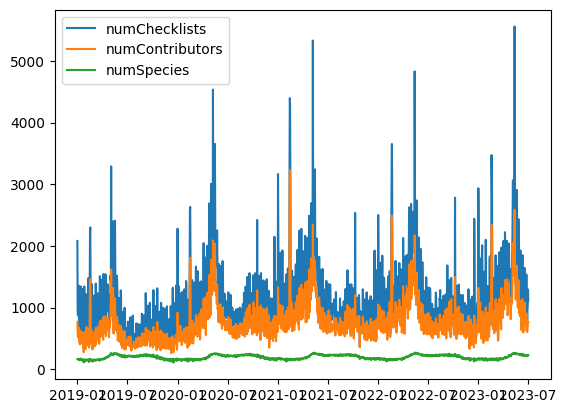

In [464]:
ny_df_complete.plot()

In [465]:
ny_df_complete.to_csv('covid?.csv')

In [468]:
# let's add 2018

from datetime import date, timedelta
def date_range_list(start_date, end_date):
    # Return generator for a list datetime.date objects (inclusive) between start_date and end_date (inclusive).
    curr_date = start_date
    while curr_date <= end_date:
        yield curr_date 
        curr_date += timedelta(days=1)

start_date = date(year=2018, month=1, day=1)
stop_date = date(year=2018, month=12, day=31)
date_list_2018 = date_range_list(start_date, stop_date)
# date_list

# for date in date_list:
#     print(date, date.isoweekday())

obs_dates_2018 = [date for date in date_list_2018]
# obs_dates_2018

In [469]:
ny_data_2018 = []
for date in obs_dates_2018:
    url = f"https://api.ebird.org/v2/product/stats/US-NY/{date.year}/{date.month}/{date.day}"
    # print(url)
    
    payload={}
    headers = {
      'X-eBirdApiToken': API_KEY
    }
    response = requests.request("GET", url, headers=headers, data=payload)
    text = response.json()
    
    ny_data_2018.append(text)

In [473]:
pd.DataFrame(ny_data_2018, index=obs_dates_2018)

,numChecklists,numContributors,numSpecies
2018-01-01,1544,608,167
2018-01-02,674,409,157
2018-01-03,741,420,153
2018-01-04,385,309,117
2018-01-05,409,310,128
...,...,...,...
2018-12-27,802,438,160
2018-12-28,413,253,127
2018-12-29,1197,527,168
2018-12-30,768,453,152


In [474]:
ny_data_complete1 = ny_data_2018 + ny_data_complete

In [475]:
obs_dates_long1 = obs_dates_2018 + obs_dates_long

In [477]:
ny_df_complete1 = pd.DataFrame(ny_data_complete1, index=obs_dates_long1)

In [478]:
ny_df_complete1.to_csv('covid?.csv')